In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import time

df = pd.read_csv('data.csv', sep='~', encoding = 'utf-8', usecols=['ContingentUnitCourse', 'ContingentUnitName', 'DivisionsString', 'DivisionName','Start', 'End', 'EducatorAssignment', 'LocationsDisplayText', 'Subject'])
df.columns = ['Start', 'End', 'Курс', 'Номер группы', 'Факультет1', 'Факультет2', 'Преподаватель', 'Адрес', 'Предмет']
df['Вид занятия']=df['Предмет'].str.split(',').str.get(1)
df['Предмет']=df['Предмет'].str.split(',').str.get(0)
df['День'] = df['Start'].str.split(' ').str.get(0)
df['Время начала'] = df['Start'].str.split(' ').str.get(1)
df['Время окончания'] = df['End'].str.split(' ').str.get(1)
df['Факультет'] = df['Факультет1'].fillna(df['Факультет2'])



def convert(x):
    x = x.tm_wday
    if x == 0:
        return 'пн'
    elif x == 1:
        return 'вт'
    elif x == 2:
        return 'ср'
    elif x == 3:
        return 'чт'
    elif x == 4:
        return 'пт'
    elif x == 5:
        return 'сб'
df['День недели'] = (df['День'].apply(time.strptime, args = ('%Y-%m-%d',))).apply(convert)
df = pd.concat([df[df['День недели'] == 'пн'], df[df['День недели'] == 'вт'], df[df['День недели'] == 'ср'], df[df['День недели'] == 'чт'], df[df['День недели'] == 'пт'], df[df['День недели'] == 'сб']], ignore_index=True)
df['Day'] = df['День'].apply(time.strptime, args = ('%Y-%m-%d',))

def weekNumber(x):
    return time.strftime("%W", time.strptime(x, "%Y-%m-%d"))    
df['Номер недели'] = df['День'].apply(weekNumber)
df = df[['Номер группы', 'Факультет', 'Курс', 'Преподаватель', 'Адрес', 'Предмет', 'Вид занятия', 'День', 'День недели', 'Номер недели', 'Время начала', 'Время окончания']]

In [28]:
df.head()

,Номер группы,Факультет,Курс,Преподаватель,Адрес,Предмет,Вид занятия,День,День недели,Номер недели,Время начала,Время окончания
0,"ЭК 5068 МО+ЭПП: 15.Б04, 15.Б08 046861 Професси...",Экономический факультет,4 Курс,67E3EB7D-7788-4355-88E6-D5F3D80C574E,"ул. Чайковского, д. 62, лит. А, 420",Траектория 3 (В1 – В2). Профессиональный практ...,практическое занятие,2018-09-24,пн,39,16:45:00.000,18:15:00.000
1,"ЭК 5068 МО+ЭПП: 15.Б04, 15.Б08 046861 Професси...",Экономический факультет,4 Курс,67E3EB7D-7788-4355-88E6-D5F3D80C574E,"ул. Чайковского, д. 62, лит. А, 420",Траектория 3 (В1 – В2). Профессиональный практ...,практическое занятие,2018-09-17,пн,38,16:45:00.000,18:15:00.000
2,"ЭК 5068 МО+ЭПП: 15.Б04, 15.Б08 046861 Професси...",Экономический факультет,4 Курс,67E3EB7D-7788-4355-88E6-D5F3D80C574E,"ул. Чайковского, д. 62, лит. А, 420",Траектория 3 (В1 – В2). Профессиональный практ...,практическое занятие,2018-09-10,пн,37,16:45:00.000,18:15:00.000
3,012961 Рентгеновские методы изучения дефектов ...,Институт наук о Земле,2 Курс,68D064DE-5C3A-41F2-BF05-6C2F2140D467,"ул. Декабристов, д. 16, 016",Электив. Рентгеновские методы изучения дефекто...,лекция,2018-09-24,пн,39,10:45:00.000,12:20:00.000
4,18.Б11-нз,Институт наук о Земле,1 Курс,99E8C394-BAB1-4B27-A1FD-BBB55C405BF4,"В.О., пер. Декабристов, д. 16, 513",Информатика и математические методы в геологии,практическое занятие,2018-09-17,пн,38,16:25:00.000,18:00:00.000


# Количество занятий по дням недели для учебных групп

In [3]:
# Ввод данных
faculty = input()
group = input()
day = input()

Математико-механический факультет
18.Б03-мм
2018-09-01


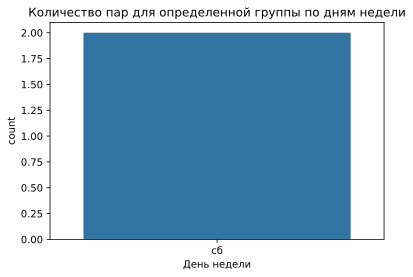

In [7]:
week = time.strftime("%W", time.strptime(day, "%Y-%m-%d"))
sns.countplot(df[(df['Номер группы'] == group) & (df['Факультет'] == faculty) & (df['Номер недели'] == week)]['День недели']);
plt.title('Количество пар для определенной группы по дням недели');

# Количество занятий конкретной дисциплины в семестре

In [8]:
faculty2 = input()
group2 = input()
lesson2 = input()

Математико-механический факультет
18.Б03-мм
Алгебра


In [11]:
df[(df['Номер группы'] == group2) & (df['Предмет'] == lesson2) & (df['Факультет'] == faculty2)]['Предмет'].count()

4

# Количество пар в неделю по дисциплинам

In [14]:
faculty3 = input()
group3 = input()
day3 = input()

Факультет социологии
15.Б01-с
2018-09-26


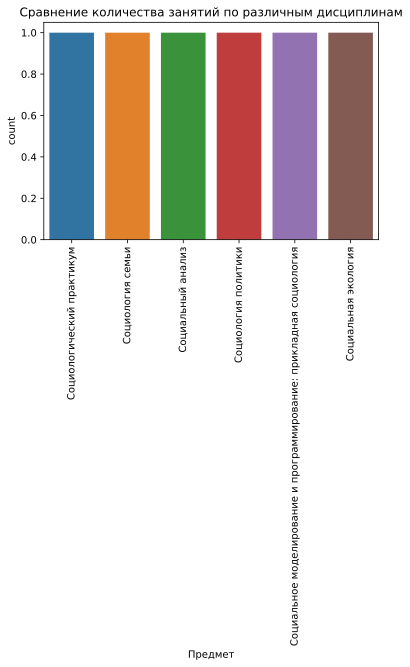

In [15]:
week3 = time.strftime("%W", time.strptime(day3, "%Y-%m-%d"))
sns.countplot(df[(df['Номер группы'] == group3) & (df['Факультет'] == faculty3) & (df['Номер недели'] == week3)]['Предмет']);
plt.title('Сравнение количества занятий по различным дисциплинам');
plt.xticks(rotation=90);

# Соотношение лекций/практик по дисциплинам учебных групп

In [16]:
faculty4 = input()
group4 = input()
lesson4 = input()

Математико-механический факультет
18.Б03-мм
Алгебра


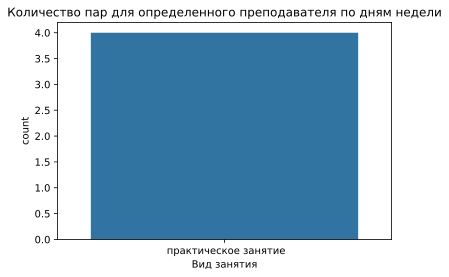

In [17]:
sns.countplot(df[(df['Номер группы'] == group4) & (df['Предмет'] == lesson4) & (df['Факультет'] == faculty4)]['Вид занятия']);
plt.title('Количество пар для определенного преподавателя по дням недели');

# Общая занятость факультетов


In [19]:
faculty5 = input()
day5 = input()

Факультет социологии
2018-09-19


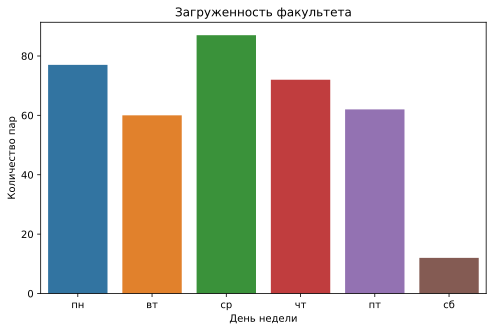

In [29]:
week5 = time.strftime("%W", time.strptime(day5, "%Y-%m-%d"))
sns.countplot(df[(df['Факультет'] == faculty5) & (df['Номер недели'] == week5)]['День недели']);
plt.ylabel('Количество пар');
plt.title('Загруженность факультета');

# Общее соотношение лекций/практик на факультете

In [42]:
faculty6 = input()
lesson6 = input()
day6 = input()

Институт наук о Земле
Информатика и математические методы в геологии
2018-09-17


In [45]:
week6 = time.strftime("%W", time.strptime(day6, "%Y-%m-%d"))
newDf = df[(df['Факультет'] == faculty6) & (df['Предмет'] == lesson6)]
newDf.head()

,Номер группы,Факультет,Курс,Преподаватель,Адрес,Предмет,Вид занятия,День,День недели,Номер недели,Время начала,Время окончания
4,18.Б11-нз,Институт наук о Земле,1 Курс,99E8C394-BAB1-4B27-A1FD-BBB55C405BF4,"В.О., пер. Декабристов, д. 16, 513",Информатика и математические методы в геологии,практическое занятие,2018-09-17,пн,38,16:25:00.000,18:00:00.000
5,18.Б11-нз,Институт наук о Земле,1 Курс,99E8C394-BAB1-4B27-A1FD-BBB55C405BF4,"В.О., пер. Декабристов, д. 16, 513",Информатика и математические методы в геологии,практическое занятие,2018-09-10,пн,37,16:25:00.000,18:00:00.000
6,18.Б11-нз,Институт наук о Земле,1 Курс,99E8C394-BAB1-4B27-A1FD-BBB55C405BF4,"В.О., пер. Декабристов, д. 16, 513",Информатика и математические методы в геологии,практическое занятие,2018-09-24,пн,39,16:25:00.000,18:00:00.000
10166,18.Б10-нз,Институт наук о Земле,1 Курс,245B2A41-FFF8-452D-950E-E97252815F22,"В.О., пер. Декабристов, д. 16, 513",Информатика и математические методы в геологии,практическое занятие,2018-09-10,пн,37,15:00:00.000,16:35:00.000
10167,18.Б10-нз,Институт наук о Земле,1 Курс,245B2A41-FFF8-452D-950E-E97252815F22,"В.О., пер. Декабристов, д. 16, 513",Информатика и математические методы в геологии,практическое занятие,2018-09-17,пн,38,15:00:00.000,16:35:00.000


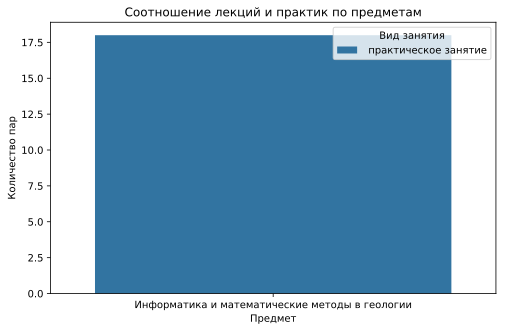

In [46]:
sns.countplot(x = 'Предмет', hue = 'Вид занятия', data = newDf);
plt.ylabel('Количество пар');
plt.title('Соотношение лекций и практик по предметам');